# CSMODEL
### Project 1 - Group 5
Members:
- Alon-alon, Jason Miguel E.
- Escalona, Jose Miguel A.
- Llorca, Marcelino Francis S.

### 1. Dataset Representation

- About the Dataset<br>

The data was provided by Our World in Data (OWID). The file contains different data values that could help paint a better image of a country’s status for COVID-19. The version used in this project will be the July 15, 2021 release of the dataset, however OWID attempts both daily and weekly update of data whenever possible, thus ensuring that the data they provide is the latest possible.

- Collection Process and its Implications<br>

The collection was done by the Our World in Data Group which is a research group that focuses on research and aggregation of data in a single accessible repository for the purposes of getting a better picture or even solving world problems that can benefit all of mankind. For the specific dataset, they made use of all possible available data that is publicly released by governments of all nations in the world. According to OWID, the data was collected from the following sources which include:
    
    1. COVID-19 Data Repository of Johns Hopkins University
    2. National Government Reports
    3. Oxford COVID-19 Government Response Tracker, Blavatnik School of Government
    4. United Nations Data (for demographics related data)
    5. World Bank Data (for demographics related data)
    
The data implies that the data presented assumes to be the latest data possible, with its validity ultimately depending on each government's transparency and accuracy with the data they are reporting publicly and to John Hopkins University.
    <br>
- Structure of Dataset of the File<br>

    The dataset's structure consists of 102,475 observations with 60 variables available. The structure goes on every country's date when it reported either its first COVID-19 case or first COVID-19 test. The dataset was already distributed publicly on a single file containing all of the relevant information possible. There is however other datasets which contain specific and specialized versions of the current dataset we are using that is also available for use on OWID's Github repository.
    
    | iso_code | continent | location | date | data1 | ... | dataX |
    | --- | --- | --- | --- | --- | --- | --- |
    | PHL | Asia | Philippines | 0000-00-01 | data | ... | dataX |
    | PHL | Asia | Philippines | 0000-00-02 | data | ... | dataX |
    | JPN | Asia | Japan | 0000-00-01 | data | ... | dataX |
    | JPN | Asia | Japan | 0000-00-02 | data | ... | dataX |
    | SGP | Asia | Singapore | 0000-00-01 | data | ... | dataX |
    | SGP | Asia | Singapore | 0000-00-02 | data | ... | dataX |
    | SGP | Asia | Singapore | 0000-00-03 | data | ... | dataX |

    The list of locations are a mixture of continents and actual countries, as recognized by OWID, which may or may not be legally recognized by the international community.
    <br>
- About the Variables<br>
    
    The dataset has 60 variables, most of which relate to COVID-19 related numbers such as cases, deaths, recoveries, vaccinations among others, as well as demographic data such as GDP per capita, HDI, median age, population, population density among others.

In [1]:
print("LOADING LIBRARIES...")
import math #MATH
import re #REGEX
import numpy as np #NUMPY
import pandas as pd #PANDAS
import matplotlib.pyplot as plt #PLOT MATPLOTLIB
import matplotlib.figure as fig #FIGURE MATPLOTLIB
import scipy.stats as stat

bar = "================================="
automated = True #Manual entry or pre-defined entries
print("AUTOMATED MODE:",automated)

#Code for data preparation
#PREPARE FILES AND RAW DATAFRAME
raw_df = None
if(not automated):
    filename = input("Enter Filename of CSV file (including .csv): ")
    raw_df = pd.read_csv(filename)
else:
    raw_df = pd.read_csv("COVID_7_15.csv")
#Raw file reading: make use of covid_df.readline() to retrieve a str line (as str) from

print("Raw Dataframe Shape:", raw_df.shape,"\n",bar)
print(raw_df.info())
print("Location List:",raw_df["location"].unique())

LOADING LIBRARIES...
AUTOMATED MODE: True
Raw Dataframe Shape: (102475, 60) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102475 entries, 0 to 102474
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               102475 non-null  object 
 1   continent                              97689 non-null   object 
 2   location                               102475 non-null  object 
 3   date                                   102475 non-null  object 
 4   total_cases                            98594 non-null   float64
 5   new_cases                              98591 non-null   float64
 6   new_cases_smoothed                     97581 non-null   float64
 7   total_deaths                           88371 non-null   float64
 8   new_deaths                             88527 non-null   float64
 9   new_deaths_smoothed                    97581 non

### 2. Data Cleaning

Given that there are a lot of nations and variables to consider, it has been decided to reduce to scope of nations to just the ASEAN nations as well as the World as a baseline. The consideration for ASEAN nations was made because of the following reasons:

1. Near proximity
2. Economic integration
3. Similar level economies and populations

This could help us determine the COVID-19 status of the Philippines to its neighbors as well as the World if ever it is applicable.

The most of the columns are to be ommitted since it contains pre-treated values, specialized values, or varying values (in terms of the unit of measurement).

The columns that were retained:

|column|
| ---|
|total_cases|
|new_cases|
|total_deaths|
|new_deaths|
|total_vaccinations|
|people_vaccinated|
|people_fully_vaccinated|
|new_vaccinations|
|stringency_index|
|population|
|gdp_per_capita|


The script below crunches the raw data and produces a covid_df containing:
1. ASEAN COVID-19 Data (Containing 10 Countries, including the Philippines)
2. Philippine COVID-19 Data

Do note however that any observation on a certain day that does not meet the required number of observations (i.e. countries that reported that day) will be automatically omitted from the resulting group dataframe. This was done in order to prevent outliers in the data and to reduce the erraticness of the output which matters since most of the data is of sum and mean value nature.

In [2]:
#CSMODEL: COVID-19 Dataset
#Crunches data of selected countries to a grouped one

#GLOBAL VARIABLES
checkpoint = False
print("CHECKPOINT:",checkpoint)
NaN = float("nan")
group_pop = 0 #Placeholder for the population of group of nations specified.

#CUSTOM FUNCTIONS
def listDates(df): #Sorts the 'date' column of a given DataFrame and returns it.
    return np.sort((df['date'].unique()),kind='mergesort')
def fillZeros(size): #Returns a list of zeros from a specified size
    return np.zeros(size).tolist()
def writeCheckpoint(df, filename): #Writes a given DataFrame to a CSV file
    if(checkpoint):
        print("WRITING CHECKPOINT...")
        df.to_csv(filename+".csv",index=False)
        print("Checkpoint Complete:",filename)
def aggregator(src_df,iso_code,continent,location,count): #Aggregates the given DataFrame to a grouped version on specific columns
    tmp_df = pd.DataFrame(columns=toRetain) 
    for i in range(dateCount):
        sp_date = date_values[i] #Specified date
        filtered_df = src_df[src_df['date']==sp_date] #Series of nations with specified date
        if(filtered_df.shape[0] == count): #Will run only if all countries listed are there
            id = [iso_code,continent,location,sp_date] #Default identifiers for ASEAN
            data = fillZeros(len(toRetainData))
            for j in range(filtered_df.shape[0]):
                #add current data with the retrieved data
                retrieve = filtered_df[toRetainData].iloc[j].tolist()
                data = list(map(lambda x,y:x+y,retrieve,data))
                #data[1] = data[1]/filtered_df.shape[0]
                data[8] = data[8]/filtered_df.shape[0]
            result = id+data
            tmp_df.loc[tmp_df.shape[0]] = result #"ADDS" THE RESULTING LIST AT THE END OF THE DATAFRAME
    return tmp_df
def dateRange(df): #Finds the lowest and highest date recorded.
    date_values = np.sort(df['date'].unique(),kind='mergesort')
    return [date_values[0], date_values[len(date_values)-1]] #the latest possible data maybe incomplete thus the day prior the latest will be used

#PREPARE FILES AND RAW DATAFRAME
covid_df = raw_df.copy(deep=True)
#Raw file reading: make use of covid_df.readline() to retrieve a str line (as str) from

#DATE SORTING AND VALUES
date_values = listDates(covid_df)
dateCount = date_values.size

#COLUMNS TO RETAIN
toRetain = ['iso_code','continent','location','date','total_cases','new_cases','total_deaths','new_deaths','total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations','stringency_index',
            'population','gdp_per_capita']
toRetainData = toRetain[4:]
identifiers = toRetain[0:4]
#LIST OF ONLY DATA THAT CAN BE USED IN A COLLECTIVE MANNER (AS USED BY OWID ITSELF)
forCollective = ['total_cases','new_cases','new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed','total_cases_per_million'
                ,'new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','total_vaccinations'
                ,'people_vaccinated','people_fully_vaccinated','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred'
                ,'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','population']
#LIST OF COUNTRIES TO RETAIN
targetCountries = ['PHL','BRN','KHM','IDN','SGP','LAO','THA','MYS','MMR','VNM']

#DROP COLUMNS
print("DROPPING COLUMNS...")
toDrop = list(set(covid_df.columns.tolist()) - set(toRetain))
covid_df = covid_df.drop(columns=toDrop)

#FILTERING COUNTRIES
print("FILTERING COUNTRIES...")
ph_df = covid_df[covid_df['iso_code']=='PHL'] #PH ONLY
covid_df = covid_df[covid_df['iso_code'].str.contains(re.compile('|'.join(targetCountries)),regex=True)] #ASEAN NATIONS; YOU CAN CHANGE LIST OF COUNTRIES TO FOCUS

#FIND TOTAL POPULATION OF ASEAN
pop = covid_df[covid_df['date']==dateRange(covid_df)[1]]
if(pop.shape[0] != len(targetCountries)): #REFERENCES TO targetCountries
    print("COUNTRIES!=",len(targetCountries),"AT MAX DATE!")
    exit()
group_pop = pop['population'].sum()

#DATA CLEANUP: NaN->0
print("DATA CLEANUP (NaN->0)...")
for i in range(0,len(toRetain),1):
    covid_df.loc[covid_df[toRetain[i]].isnull(),toRetain[i]]=0

#READING CONENTS OF EACH OBSERVATION AVAILABLE OF ALL COUNTRIES AVAILABLE ON A GIVEN DATE 
#NOT THE MOST EFFICIENT ALGO AS IT RUNS AT O(n*m)
#WILL MAKE USE OF THE CURRENT LIST OF COUNTRIES AVAILABLE AT covid_df.
print("AGGREGATING ASEAN COUNTRIES...")
group_df = aggregator(covid_df,"MDL_SEA",NaN,"Asia",len(targetCountries)) #Will hold the resulting aggregation of ASEAN countries

#ASEAN Checkpoint
writeCheckpoint(group_df,"asean_checkpoint")

#Combined dataframes
print("Available iso_codes:",pd.concat([covid_df,group_df])['iso_code'].unique())
print("Available columns:",toRetain)
print("FILE PROCESSING COMPLETE!")

print("DATAFRAMES AVAILABLE FOR USE: covid_df, world_df, group_df, ph_df")

CHECKPOINT: False
DROPPING COLUMNS...
FILTERING COUNTRIES...
DATA CLEANUP (NaN->0)...
AGGREGATING ASEAN COUNTRIES...
Available iso_codes: ['BRN' 'KHM' 'IDN' 'LAO' 'MYS' 'MMR' 'PHL' 'SGP' 'THA' 'VNM' 'MDL_SEA']
Available columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'stringency_index', 'population', 'gdp_per_capita']
FILE PROCESSING COMPLETE!
DATAFRAMES AVAILABLE FOR USE: covid_df, world_df, group_df, ph_df


**The following dataframes could be used for the proceeding code:**
- covid_df = Choosen Countries COVID data (ASEAN in this case)
- group_df = Overall ASEAN COVID data
- world_df = Overall World COVID data
- ph_df = Philippine COVID data

In [3]:
#Sorting DataFrames by Date
def minmaxDates(capsule, capsule_str):
    for i in range(len(capsule)):
        print(capsule_str[i],":",capsule[i]['date'].iloc[0],"→",capsule[i]['date'].iloc[capsule[i].shape[0]-1])

covid_df.sort_values(by='date')
group_df.sort_values(by='date')
ph_df.sort_values(by='date')

capsule = [covid_df, group_df, ph_df]
capsule_str = ['covid_df','group_df','ph_df']

minmaxDates(capsule,capsule_str)

covid_df : 2020-03-09 → 2021-07-14
group_df : 2020-03-27 → 2021-07-14
ph_df : 2020-01-30 → 2021-07-14


Based from the output above, the only valid data that is possible to use are those starting April 1 of 2020 up to July 1 of 2021.

In [4]:
#DROPPING OBSERVATIONS THAT FALL BELOW THE RECOMMENDED MINIMUM DATE
minDate = '2020-04-01'
maxDate = '2021-07-01'
covid_df = covid_df[(covid_df['date'] >= minDate) & (covid_df['date'] <= maxDate)]
group_df = group_df[(group_df['date'] >= minDate) & (group_df['date'] <= maxDate)]
ph_df = ph_df[(ph_df['date'] >= minDate) & (ph_df['date'] <= maxDate)]

capsule = [covid_df, group_df, ph_df]
minmaxDates(capsule,capsule_str)

print("\n")
for i in range(len(capsule)):
    print(capsule_str[i],":",capsule[i].shape)

covid_df : 2020-04-01 → 2021-07-01
group_df : 2020-04-01 → 2021-07-01
ph_df : 2020-04-01 → 2021-07-01


covid_df : (4570, 15)
group_df : (457, 15)
ph_df : (457, 15)


The dataframe covid_df contains 10 countries thus covid_df has effectively 457 observations as well which means that all dataframes are already "synchronized" on a date range which could helping in elimnating outliers or any data from other countries on a date range that a specific country has not reported on.

### 3. Exploratory Data Analysis

Before the discussion regarding the EDA Questions, the data shall be explored as on an as-is basis to see what do the following contents of the dataframe show.

**COVID Case Numbers**

In [5]:
#Returns a line chart based on a country from the covid_df
def createCountryLineChart(df,iso_code, x_param, y_param, xlabel, ylabel, chart_title):
    line_chart = df[df["iso_code"] == iso_code].plot(x=x_param, y=y_param, figsize=(6, 4)) 
    line_chart.set_xticklabels(line_chart.get_xticklabels(), fontsize=9)
    line_chart.set_title(chart_title)
    line_chart.set_xlabel(xlabel)
    line_chart.set_ylabel(ylabel)
    plt.tight_layout()
    return line_chart

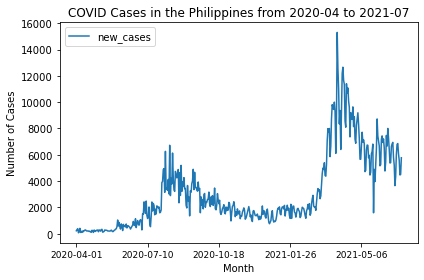

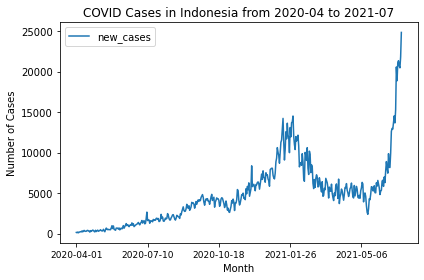

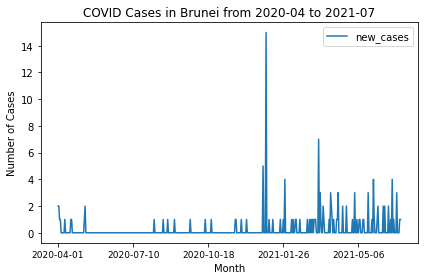

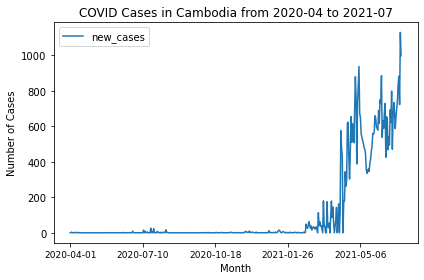

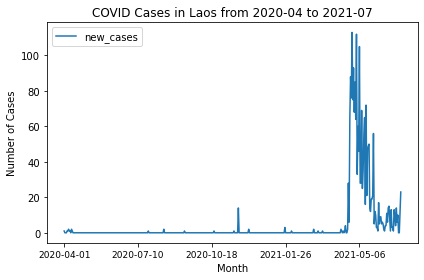

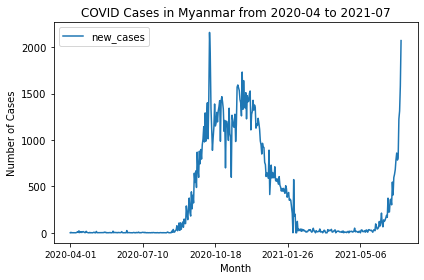

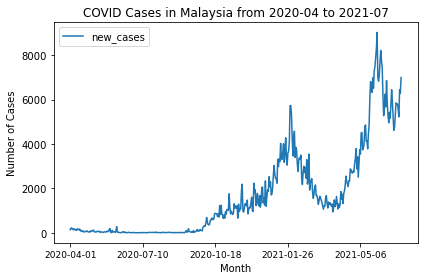

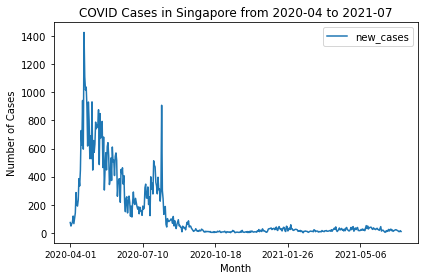

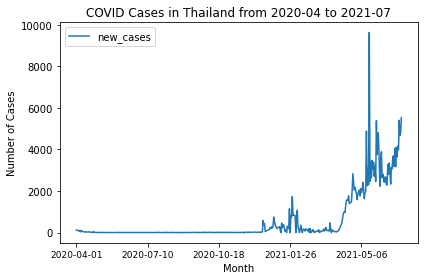

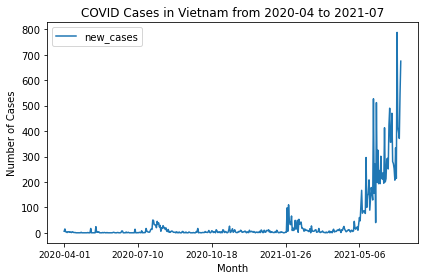

In [6]:
PHL_graph = createCountryLineChart(covid_df, "PHL", "date", "new_cases", "Month", "Number of Cases", "COVID Cases in the Philippines from 2020-04 to 2021-07")
IDN_graph = createCountryLineChart(covid_df, "IDN", "date", "new_cases", "Month", "Number of Cases", "COVID Cases in Indonesia from 2020-04 to 2021-07")
BRN_graph = createCountryLineChart(covid_df, "BRN", "date", "new_cases", "Month", "Number of Cases", "COVID Cases in Brunei from 2020-04 to 2021-07")  
KHM_graph = createCountryLineChart(covid_df, "KHM", "date", "new_cases", "Month", "Number of Cases", "COVID Cases in Cambodia from 2020-04 to 2021-07")     
LAO_graph = createCountryLineChart(covid_df, "LAO", "date", "new_cases", "Month", "Number of Cases", "COVID Cases in Laos from 2020-04 to 2021-07")
MMR_graph = createCountryLineChart(covid_df, "MMR", "date", "new_cases", "Month", "Number of Cases", "COVID Cases in Myanmar from 2020-04 to 2021-07")
MYS_graph = createCountryLineChart(covid_df, "MYS", "date", "new_cases", "Month", "Number of Cases", "COVID Cases in Malaysia from 2020-04 to 2021-07")
SGP_graph = createCountryLineChart(covid_df, "SGP", "date", "new_cases", "Month", "Number of Cases", "COVID Cases in Singapore from 2020-04 to 2021-07")
THA_graph = createCountryLineChart(covid_df, "THA", "date", "new_cases", "Month", "Number of Cases", "COVID Cases in Thailand from 2020-04 to 2021-07")  
VNM_graph = createCountryLineChart(covid_df, "VNM", "date", "new_cases", "Month", "Number of Cases", "COVID Cases in Vietnam from 2020-04 to 2021-07")  

It could be observed that the majority of the ASEAN nations (including the Philippines) experience a definite increase in their daily new_cases well after the start of 2021. This could be attributed more to the fact that these nations are trying to open up a bit more to recover the lost economic activity from 2020 as well as the entry of a more dangerous variant of COVID-19 on the following nation's borders. The following chart shows the stringency index of all of ASEAN from April 2020 up to before July of 2021 to support the assumption of reasons as to why COVID cases have risen this 2021.

*Note*
The reason for omitting July 1, 2021 is because no data has been submitted on that data 

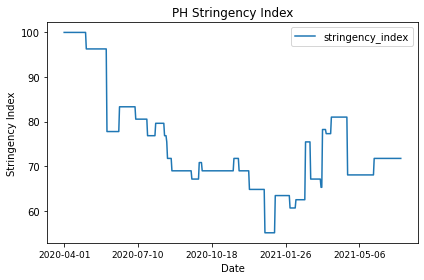

In [7]:
ph_stringencyGraph = createCountryLineChart(covid_df,'PHL', 'date', 'stringency_index', 'Date', 'Stringency Index', 'PH Stringency Index')

**EDA Questions:**<br>
1. Do case trends (new_cases) in the Philippines significantly differ to ASEAN every month period.
2. Is there a correlation between the GDP per capita to hospital and ICU patients of a country?
3. Do case numbers correlate negatively with the number of people being vaccinated?

**1. Do case trends (new_cases) in the Philippines significantly differ to other ASEAN nations on a monthly average?**<br>

Compares PH monthly case trend on a monthly average and checks if there is a significant differences against the same monthly average on ASEAN.

The following code block will find the respective CI values of the Philippines' new cases per month and will compare it to the overall new cases reported by all of ASEAN member nations (including the Philippines).

The general formula for both population and sample size will be $s=d*n$ ($c$=country, $d$=days with report), thus the population size of ASEAN will be around $\geqslant300$ (~30 days with 10 countries) and the Philippines expected to be $~30$.

The statistical parameters will be set at 95% confidence level at a two-tailed approach.

In [8]:
def findMonthlyNewCases(df,grouping,mode,asDataFrame): #REFACTORED CODE BY JASON FOR REUSABILITY
    df.groupby('iso_code')
    df['date'].str[:7]
    df = df.assign(year_month = df['date'].str[:7])
    list = df.groupby(grouping).new_cases.agg(mode)
    if asDataFrame:
        return pd.DataFrame(list).reset_index()
    else:
        return list

#Add a "year_month" column based on "date" column
df_indiv_monthly_totals = findMonthlyNewCases(covid_df,['iso_code','year_month'],['sum','mean','std'],True)
df_ph_monthly_totals = findMonthlyNewCases(ph_df,['iso_code','year_month'],['sum','mean','std'],True)

print("ASEAN Nation's Monthly New Cases:\n",df_indiv_monthly_totals,"\n")

ASEAN Nation's Monthly New Cases:
     iso_code year_month     sum        mean         std
0        BRN    2020-04     9.0    0.300000    0.595963
1        BRN    2020-05     3.0    0.096774    0.396219
2        BRN    2020-06     0.0    0.000000    0.000000
3        BRN    2020-07     0.0    0.000000    0.000000
4        BRN    2020-08     3.0    0.096774    0.300537
..       ...        ...     ...         ...         ...
155      VNM    2021-03   155.0    5.000000    5.709641
156      VNM    2021-04   325.0   10.833333    8.271610
157      VNM    2021-05  4504.0  145.290323  128.280212
158      VNM    2021-06  9620.0  320.666667  132.494199
159      VNM    2021-07   675.0  675.000000         NaN

[160 rows x 5 columns] 



<AxesSubplot:title={'center':'mean'}, xlabel='[year_month]'>

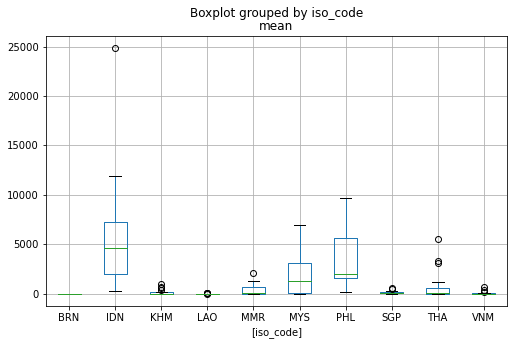

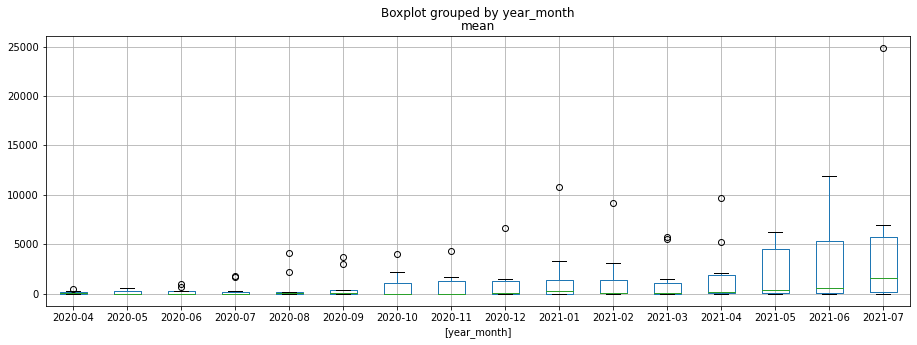

In [9]:
#VISUALIZATIONS
df_indiv_monthly_totals.boxplot("mean", by=["iso_code",], figsize=(8,5),autorange=True) #new_cases mean per iso_code
df_indiv_monthly_totals.boxplot("mean", by=["year_month",], figsize=(15,5),autorange=True)#new_cases mean per year_month

The visualization shows ranges of the monthly average of new cases of COVID-19 being reported by every nation in the ASEAN. Based from the visualization, the top 3 countries with the highest monthly average of new cases are the **Indonesia, the Philippines, and Malaysia**. This is despite of the countries increasing vaccination rate as shown in the third graph but it seems that it is not enough given the population of the Philippines of around 109 million people. The boxplot also shows that there are potential outliers in the data shown, however this could be considered more of a spike in cases rather than an outlier but it must be considered as well that **governments may have done changes on their method of recording or may have made mistakes on their reported new case numbers** that may have caused the supposed outliers.

From the results, the month of July 2021 will be ommitted given that the lower and upper confidence intervals are NaN, because the only value available there is the 1st of July, as the result of date synchronization that was done in data cleaning. Additionally the resulting NaN is caused by the fact that $n=1$ and $std=\sqrt{ \frac{ \sum x-x^{2} }{n-1} }$ with $n-1$ resulting to $0$.

**3. Do case numbers correlate negatively with the number of people being vaccinated?**

To visually represent this, a scatter plot was decided to best show (at a glance) on how cases correlate to the number of new vaccinations being inocculated to Filipinos at the time this was made. The each corner (quadrants) of the scatter plot shows the four following scenarios:
1. Upper-Right (Quadrant 1): High vaccination rate, High new cases
2. Upper-Left (Quadrant 2): Low vaccination rate, High new cases
3. Lower-Left (Quadrant 3): Low vaccination rate, Low new cases
4. Lower-Right (Quadrant 4): High vaccination rate, Low new cases

Ideally, governments should aim for the **fourth quadrant** scenario at should steer away from reaching either of the first two quadrants.

<AxesSubplot:xlabel='new_vaccinations', ylabel='new_cases'>

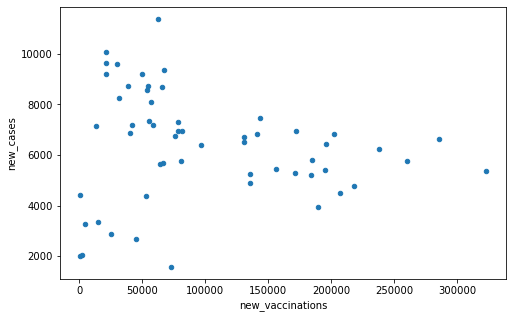

In [10]:
ph_df.plot.scatter('new_vaccinations','new_cases',figsize=(8,5)) #Philippines' New Cases to New Vaccinations Scatter Plot

The visualization shows that the Philippines belongs mostly on the center middle and upper left part of the scatter plot, indicating that as vaccinations, for the moment, may aid in reducing the number of new cases arising. However, the number of people vaccinated is still at 11.7M people (Kabagani, 2021), which is still tens of millions away from the target herd immunity of 70% of a country's population (Swaminathan & Gupta-Smith, 2020).  

### 4. Research Question

**1. Is there a significant difference between the Philippines and ASEAN member nations in the monthly average of COVID-19 new cases?**

1. Scope in Dataset: New cases of all ASEAN nations with the Philippines being the "sample".
2. Significance: This is in order to know how the Philippines fare against COVID-19 (whether lower or higher in new case numbers) in comparison to our neighboring countries in the ASEAN as well as in the world such that if there is a significant difference.

**2. Can the government’s capability of conducting vaccinations catch up to the rate of new cases?**

1. Each specific 'group' will be of a specific month (i.e. 1st day of the month; First vaccines arrived at February 28, 2021)
2. New Vaccinations vs New Cases; However numbers (totals) will vary from each other

### 5. Statistical Inference

**For Research Question 1:**<br>
$H_0 = $ There is no difference between the Philippines and the whole of ASEAN member nations on their average of new COVID-19 cases.<br>
$H_A = $ There is a difference between the Philippines and the whole of ASEAN member nations on their average of new COVID-19 cases.

In [11]:
#Confie

year_month = (covid_df['date'].str[:7]).unique().tolist()
#year_month.pop(len(year_month)-1) #Remove July
    
#TO MEET THE MINIMUM QUANTITY OF 30 SAMPLES FROM A POPULATION
#To use: covid_df (population) and ph_df (sample); Purposive sampling
#iterative per year_month[i]
#find date_df[i] = covid_df[covid_df['date'].str.contains(year_month[i])] => all entries for that month regardless of country (still part of ASEAN); expect ~30*10 entries
#find ph_date_df[i] = ph_df[ph_df['date'].str.contains(year_month[i])] => as sample from covid_df; expect ~30+ entries
#agg[mean,std] for every year_month of date_df and ph_date_df
#@95% confidence; 0.975

def margin_error(z,std,n): #(z_val, sample_std, sample_size)
    return z*(std/math.sqrt(n))
def CI(m, e): #(sample_mean,sample_mgerr)
    return [m-e,m+e]

#statistical parameters
confidence = 0.95
significance = 1-confidence
z_val = stat.norm.ppf(1-significance/2) #two-tail; remove '/2' if one-tailed
print("Confidence Value:",confidence)
print("Z-Val:",z_val)

#placeholders; for visualization purposes
lo_ci=[]; hi_ci=[]
asean_monthly=[]; ph_monthly=[]

#statistical treatment
for i in range(len(year_month)):
    #dataframes to use
    asean_date_df = (covid_df[covid_df['date'].str.contains(year_month[i])]).reset_index()
    ph_date_df = (ph_df[ph_df['date'].str.contains(year_month[i])]).reset_index()
    #aggregations
    asean_agg_df = asean_date_df.agg({'new_cases':['mean','std']})#population
    ph_agg_df = ph_date_df.agg({'new_cases':['mean','std']})#sample
    asean_monthly.append(asean_agg_df['new_cases']['mean']) #list of pop means
    ph_monthly.append(ph_agg_df['new_cases']['mean'])
    n=ph_date_df.shape[0]
    err=margin_error(z_val,ph_agg_df['new_cases']['std'],n)#margin of error
    ci=CI(ph_agg_df['new_cases']['mean'],err)
    lo_ci.append(ci[0])
    hi_ci.append(ci[1])

treated = {'year_month':year_month,'lo_ci':lo_ci,
           'asean_monthly':asean_monthly,'ph_monthly':ph_monthly,
           'hi_ci':hi_ci
          }

ph_asean_ncase_df = pd.DataFrame(treated,columns=['year_month','lo_ci','asean_monthly','hi_ci','ph_monthly'])
ph_asean_ncase_df['in_range'] = np.where((ph_asean_ncase_df['lo_ci']<= asean_monthly)&(ph_asean_ncase_df['hi_ci'] >= asean_monthly),'Within','Not Within')
ph_asean_ncase_df

Confidence Value: 0.95
Z-Val: 1.959963984540054


,year_month,lo_ci,asean_monthly,hi_ci,ph_monthly,in_range
0,2020-04,184.194733,116.673333,242.738600,213.466667,Not Within
1,2020-05,238.954242,150.803226,380.271564,309.612903,Not Within
2,2020-06,571.072810,197.970000,724.127190,647.600000,Not Within
3,2020-07,1526.240579,377.293548,2076.340066,1801.290323,Not Within
4,2020-08,3745.881126,645.203226,4477.667262,4111.774194,Not Within
5,2020-09,2724.985022,728.760000,3333.348311,3029.166667,Not Within
6,2020-10,2048.901547,814.000000,2404.969421,2226.935484,Not Within
7,2020-11,1560.115465,841.660000,1833.284535,1696.700000,Not Within
8,2020-12,1255.409096,1069.980645,1482.268324,1368.838710,Not Within
9,2021-01,1515.496639,1670.941935,1810.567877,1663.032258,Within


R: PH LoCI
G: ASEAN Mean
B: PH HiCI


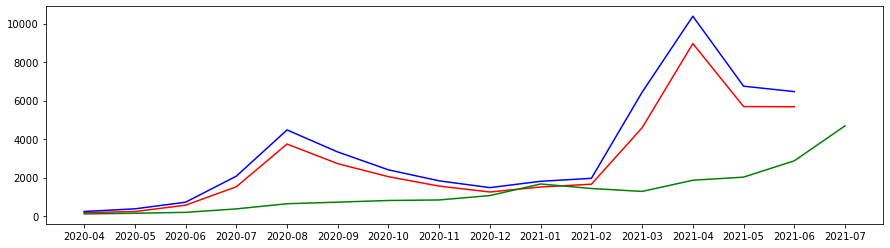

In [12]:
#PLOTTING CONFIDENCE INTERVAL LEVELS ALONGSIDE ASEAN NEW CASE MEAN
plt.figure().set_figwidth(15)
def prepLineGraph(x,y,c): #Referenced from https://www.geeksforgeeks.org/matplotlib-pyplot-axvline-in-python/
    plt.plot(x,y,color=c)

print("R: PH LoCI\nG: ASEAN Mean\nB: PH HiCI")
prepLineGraph(ph_asean_ncase_df['year_month'].tolist(),ph_asean_ncase_df['lo_ci'].tolist(),'r')
prepLineGraph(ph_asean_ncase_df['year_month'].tolist(),ph_asean_ncase_df['asean_monthly'].tolist(),'g')
prepLineGraph(ph_asean_ncase_df['year_month'].tolist(),ph_asean_ncase_df['hi_ci'].tolist(),'b')

In [15]:
#Individual T-Test (Dependent)
ttestResult = stat.ttest_rel(ph_asean_ncase_df['asean_monthly'],ph_asean_ncase_df['ph_monthly']) #TTest for Related 
print("t-Test P-Value:",ttestResult.pvalue)
print("t-Test < Significance: ", ttestResult.pvalue<significance)

t-Test P-Value: 0.002346490599962187
t-Test < Significance:  True


**For Research Question 2:**<br>
$H_0 = $ <br>
$H_A = $ <br>

In [14]:
#recommended to use:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html
# or https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr

### 6. Insights and Conclusions

{CONENT}